# Biodiversity Analysis Project

## Project Scope

This project aims to address the decline in biodiversity within national parks, a concern that affects environmental health and community well-being. Using existing species data from four national parks, patterns are analyzed in species endangerment to develop predictive models to identify at-risk species. The goal is to enhance biodiversity monitoring and enable proactive conservation efforts. The following scope outlines the problem, goals, data, analysis, and evaluation for this project.

### Problem
Problem
The decline in biodiversity within national parks poses environmental, economic, and cultural threats. Endangered species in these parks need to be identified and protected to maintain ecological balance.

Impact
This issue impacts environmentalists, park authorities, tourists, and local communities. Loss of biodiversity can lead to ecosystem imbalance, affecting everyone relying on these ecosystems.

Current Solutions & Gaps:
Present solutions include tracking species through manual surveys and limited technological tools. Gaps include lack of comprehensive data, real-time monitoring, and predictive analysis for proactive measures.

### Goals

Goals 
To identify patterns and themes in species becoming endangered in national parks and to predict species most at risk.

Key Questions
- What is the distribution of conservation_status for animals?
- Are the differences between species and their conservation status significant?
- Are certain types of species more likely to be endangered?
- What is the distribution for protected species at each park?
- Is there correlation between protected plant sightings and protected animal sightings?

Success Metrics
Successful prediction models for identification of key factors leading to endangerment, and implementation suggestions for effective conservation strategies based on findings.


### Data

Internal Data
Existing records of 5,541 species in 4 national parks, providing historical data on species name, species category, and conservation status. There are also 23,296 records of observations of species seen within the last 7 days at these parks.

External Data Needs
N/A for the scope of this project. 


### Analysis

Analysis Type
Descriptive analysis of current species, data visualizations, predictive modeling for species at risk, and detection of patterns in endangerment.

Some of the key metrics that will be computed include: 

- Distributions
- counts
- relationship between species
- conservation status of species
- observations of species in parks. 

### Evaluation

Though outside the scope of this project, it would be beneficial to assess the accuracy and impact of the predictive models and conservation strategies through a combination of field validation and data analysis. Feedback from park authorities and environmental experts will play a crucial role in measuring the effectiveness of the interventions. Periodic reviews of biodiversity changes in the national parks, compared against baseline data, will provide tangible metrics of success. This continuous evaluation process will not only ensure the project's alignment with its goals but also guide necessary adjustments for sustained ecological improvement and effective resource management.


## Project Starts

### Import Modules

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data

To analyze the status of conservation of species and their observations in national parks, load the datasets into DataFrames. Once loaded as DataFrames the data can be explored and visualized with Python.

In the next steps, Observations.csv and Species_info.csv are read in as DataFrames called species and obsiervations. The newly created DataFrames are viewed with .head() to check its contents.

In [2]:
# Upload species data
species = pd.read_csv("/Users/Dan/Downloads/biodiversity_starter/species_info.csv")

species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### Species Data
The species_info.csv contains information on the different species in the National Parks. 

The columns in the data set include: 
- category - The category of taxonomy for each species 
- scientific_name - The scientific name of each species 
- common_names - The common names of each species 
- conservation_status - The species conservation status

In [3]:
# Upload observations data
observations = pd.read_csv("/Users/Dan/Downloads/biodiversity_starter/observations.csv")

observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Observations Data
The Observations.csv contains information from recorded sightings of different species throughout the national parks in the past 7 days. 

The columns included are: 
- scientific_name - The scientific name of each species park_name 
- park_name - The name of the national park observations 
- observations - The number of observations in the past 7 days

### Exploratory data analysis
Initial review to form foundational understanding of data and discover patterns.

#### Species EDA (see below)

Data type:
From a Brief review of data it looks like the data types can remain as objects for our analysis. 

Data format:
The common_names column has multiple values per row. This will be okay for our analysis.

Missing data:
Yes there is a significant amount of blank data in the conservation_status (5,633). From further review it has been determined that these values are blank for species that are not currently in need of conservation. The values will be renamed 'Low Concern'. 

In [4]:
# SPECIES DATA -Exploritory data analysis
print(species.count())
print()
print(species.info())
print()
print(species.columns)
print()
print(species['category'].unique())

category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


#### Observations EDA (see below)

Data type:
From a Brief review of data it looks like the data types can remain as objects and ing64 for our analysis. 

Data format:
Format seems okay for our analysis.

Missing data:
No missing data, but with a data set this large there is potential for duplicate rows.

In [5]:
# OBSERVATION DATA Exploritory data analysis 
print(observations.count())
print()
print(observations.info())
print()
print(observations.columns)
print()
print(observations['park_name'].unique())

scientific_name    23296
park_name          23296
observations       23296
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None

Index(['scientific_name', 'park_name', 'observations'], dtype='object')

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


### Clean Data
Check for duplicates and rename empty values in species conservation status.

In [6]:
# SPECIES - Check for duplicates 
# No duplicates

duplicate_rows = species[species.duplicated(['category', 'scientific_name', 'common_names', 'conservation_status'])]                                  

print(duplicate_rows)

Empty DataFrame
Columns: [category, scientific_name, common_names, conservation_status]
Index: []


In [7]:
# OBSERVATION - Check for duplicates

# Check for duplicates 
duplicate_rows = observations[observations.duplicated(['scientific_name', 'park_name', 'observations'])]                                  
print(duplicate_rows)

# 15 duplicate rows (a fractional % of entire data set)

# Remove duplicate rows 
observations_clean = observations.drop_duplicates(subset=['scientific_name', 'park_name', 'observations'])



              scientific_name                            park_name  \
7263   Echinochloa crus-galli  Great Smoky Mountains National Park   
8710    Streptopelia decaocto            Yellowstone National Park   
10038          Plantago major  Great Smoky Mountains National Park   
10674           Arctium minus               Yosemite National Park   
12381    Eleocharis palustris  Great Smoky Mountains National Park   
13372     Hesperis matronalis                  Bryce National Park   
16741       Prunella vulgaris  Great Smoky Mountains National Park   
17378    Potentilla norvegica               Yosemite National Park   
17577      Spilogale putorius            Yellowstone National Park   
18141           Poa compressa  Great Smoky Mountains National Park   
19392       Cichorium intybus            Yellowstone National Park   
20294  Botrychium virginianum            Yellowstone National Park   
20820    Monotropa hypopithys  Great Smoky Mountains National Park   
21151     Trifolium 

In [8]:
# SPECIES - Missing data conservation status

# Looks like 5,633 missing data are for species with low concern for endangerment

# Changed all NaN values to "Low Concern"

species['conservation_status'] = species['conservation_status'].fillna('Low Concern')
print(species['conservation_status'].value_counts())

conservation_status
Low Concern           5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64


## ANALYSIS

What is the distribution of conservation_status for animals?

- The vast majority of species (97%) were not under conservation status. This can be seen in the analysis below. There are a total of 5,633 out of 5,824 species that do not have conservation status. These species have been renamed 'Low Concern' for this project. 


In [9]:
# What is the distribution of conservation_status for animals?

# View category types
category_count = species['category'].value_counts()
print(category_count)
print()

# Get distribuiton conservation status of animals only
animal_categories = ['Bird', 'Mammal', 'Fish', 'Amphibian', 'Reptile']
animals_only = species[species['category'].isin(animal_categories)]

# Display table of distribution percentages
conservation_status_order = ['Low Concern', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery']
table = pd.crosstab(index=animals_only['category'], columns=animals_only['conservation_status'], normalize='index') * 100
table = table.reindex(columns=conservation_status_order).fillna(0)
formatted_table = table.applymap(lambda x: '< 1%' if 0 < x < 1 else f"{x:.0f}%")

formatted_table

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64



/var/folders/11/2n75byq52r1303jqk2mx23980000gp/T/ipykernel_10838/1643618034.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_table = table.applymap(lambda x: '< 1%' if 0 < x < 1 else f"{x:.0f}%")


conservation_status,Low Concern,Species of Concern,Threatened,Endangered,In Recovery
category,,,,,
Amphibian,91%,5%,2%,1%,0%
Bird,85%,14%,0%,< 1%,< 1%
Fish,91%,3%,3%,2%,0%
Mammal,82%,13%,< 1%,3%,< 1%
Reptile,94%,6%,0%,0%,0%


Are the differences between species and their conservation status significant?

To compare the significance of all species and their conservation status, the species were reorganized into the catagories "not protected" and "protected". Not protected includes all species with low concern conservation status and protected includes all conservation statuses other than low concern. 

- Results all species
According to the chi2 analysis below, there is a significant association between the species and their protection status. This is supported by the p value 5.5 ^-89 which is practically zero. 

In [10]:
# Are the differences between all species and their conservation status significant?

# Create new table showing species categories "protected" if they are NOT considered "Low Concern"

species['is_protected'] = species.conservation_status != 'Low Concern'

category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts


,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [11]:
# Gather all data into lists to run chi2 analysis for all species
data = {
    'category': ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile', 'Vascular Plant'],
    'not_protected': [72, 413, 115, 146, 328, 73, 4216],
    'protected': [7, 75, 11, 30, 5, 5, 46]
}

category_counts = pd.DataFrame(data)

# Run chi 2 test

from scipy.stats import chi2_contingency

# Selecting only the numerical columns for the test
observed_frequencies = category_counts[['not_protected', 'protected']]

chi2, p, dof, expected = chi2_contingency(observed_frequencies)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)

Chi-Square Statistic: 426.5293138320011
P-value: 5.5108280473137505e-89


Are certain types of species more likely to be endangered?
For this analysis mammals, birds and reptiles were analysed. While the results suggest that there is not a significant relationship between mammals and birds, it does suggest that mammals have a higher rate of needing protection vs reptiles.

- Results mammals and birds:
The P value = 0.68 is greater than .05 indicating there is not a significant relationship between mammals and birds conservations status

- Results mammals and reptiles:
The P value = 0.038 is less than .05 indicating there is a significant difference between mammals and reptiles. It can be assumed that mammals have a higer rate of needing protection compared to reptiles.

In [12]:
# statistical significance between mammals and birds

# P value = 0.68 which is greater than .05 indicating there is not a significant relationship between mammals and birds

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)


Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

In [13]:
# statistical significance between mammals and reptiles

# P value = 0.038 which is less than .05 indicating there is a significant difference between mammals and reptiles.
# mammals have a higer rate of needing protection

contingency2 = [[30, 146],
              [5, 73]]
chi2_contingency(contingency2)


Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

What's the distribution for protected species at each park?
 - All protected species were seen in the last 7 days. Each park had all protected species seen at them. 
 - Yellowstone National Park had the most sitings of protected species (44,583, approx 43%)
 

In [14]:
# Filter for protected species
protected_species = species[species['is_protected']]

# Merge protected species with observations
merged_protected_species = pd.merge(protected_species, observations_clean, on='scientific_name')


# Amount of protected species per park
# Count the unique protected species per park
species_count_per_park = merged_protected_species.groupby('park_name')['scientific_name'].nunique()

species_count_per_park


park_name
Bryce National Park                    179
Great Smoky Mountains National Park    179
Yellowstone National Park              179
Yosemite National Park                 179
Name: scientific_name, dtype: int64

In [15]:
# Which park had the most protected species spotted?
# Sum the observations for each park
total_observations_per_park = merged_protected_species.groupby('park_name')['observations'].sum()

# Sort the total observations in descending order
sorted_total_observations = total_observations_per_park.sort_values(ascending=False)

print(sorted_total_observations)

print()
print()

# Show proportions of parks with most protected species spotted
# Calculate the total observations across all parks
total_observations_all_parks = total_observations_per_park.sum()

# Calculate the proportion of total observations for each park
proportions_observations_per_park = total_observations_per_park.apply(lambda x: (x / total_observations_all_parks) * 100)

# Sort the proportions in descending order
sorted_proportions_observations = proportions_observations_per_park.sort_values(ascending=False)

print(sorted_proportions_observations)

park_name
Yellowstone National Park              44583
Yosemite National Park                 26913
Bryce National Park                    18609
Great Smoky Mountains National Park    12816
Name: observations, dtype: int64


park_name
Yellowstone National Park              43.317690
Yosemite National Park                 26.149182
Bryce National Park                    18.080858
Great Smoky Mountains National Park    12.452269
Name: observations, dtype: float64


Is there correlation between protected plant sightings and protected animal sighting at the parks?
- Yes there is a very strong positive correlation (0.99 pearsons correlation) between protected plant sightings and protected animal sightings at the parks. This suggests that engangered plant species could possibly have a direct impact on protect animal species


In [16]:
# Add a new column to classify as 'Plant' or 'Animal'
merged_protected_species['species_type'] = merged_protected_species['category'].apply(lambda x: 'Plant' if 'Plant' in x else 'Animal')

# Group sightings by park and species type
total_observations_per_park_and_type = merged_protected_species.groupby(['park_name', 'species_type'])['observations'].sum().reset_index()

pivot_table = total_observations_per_park_and_type.pivot(index='park_name', columns='species_type', values='observations').fillna(0)

# Sort the pivot table by park name
sorted_pivot_table = pivot_table.sort_index()

print(sorted_pivot_table)

print()

# Show tables with proportions
total_observations_by_park = sorted_pivot_table.sum(axis=1)
proportions_pivot_table = sorted_pivot_table.divide(total_observations_by_park, axis=0)
percentage_pivot_table = proportions_pivot_table * 100
print(percentage_pivot_table)

species_type                         Animal  Plant
park_name                                         
Bryce National Park                   13925   4684
Great Smoky Mountains National Park    9493   3323
Yellowstone National Park             33698  10885
Yosemite National Park                20251   6662

species_type                            Animal      Plant
park_name                                                
Bryce National Park                  74.829384  25.170616
Great Smoky Mountains National Park  74.071473  25.928527
Yellowstone National Park            75.584864  24.415136
Yosemite National Park               75.246164  24.753836


Pearson's correlation coefficient: 0.9999925482607397


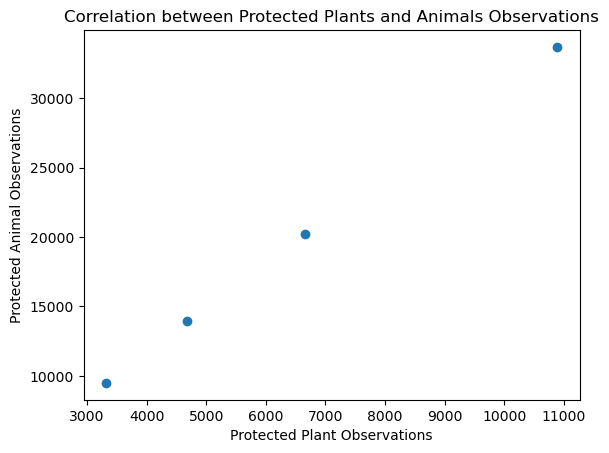

In [17]:
# Is there correlation between protected plant and protected animal sightings? 

# Add a new column to classify as 'Plant' or 'Animal'
merged_protected_species['species_type'] = merged_protected_species['category'].apply(lambda x: 'Plant' if 'Plant' in x else 'Animal')

# Group by park and species type, then sum the observations
species_count_per_park_and_type = merged_protected_species.groupby(['park_name', 'species_type'])['observations'].sum().unstack()

# Fill NaN values with 0 if there are parks with either no protected plants or animals
species_count_per_park_and_type.fillna(0, inplace=True)

# Calculate Pearson's correlation coefficient
correlation = species_count_per_park_and_type['Plant'].corr(species_count_per_park_and_type['Animal'])

print("Pearson's correlation coefficient:", correlation)

plt.scatter(species_count_per_park_and_type['Plant'], species_count_per_park_and_type['Animal'])
plt.title('Correlation between Protected Plants and Animals Observations')
plt.xlabel('Protected Plant Observations')
plt.ylabel('Protected Animal Observations')
plt.show()


## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.
This project was also able to answer the following questions:

- What is the distribution of conservation_status for animals?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference. There was also a significance between all species and their conservation status.
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection. 
- What is the distribution for protected species at each park?
    - All protected species were seen in the last 7 days. Each park had all protected species seen at them. 
    - Yellowstone National Park had the most sightings of protected species (44,583, approx 43%)
    - Accross all four parks the sightings for protected species were approx 75% animals and 25% plants
- Is there correlation between protected plant sightings and protected animal sightings?
    - Yes there is a very strong positive correlation (0.99 pearsons correlation) between protected plant sightings and protected animal sightings at the parks. This suggests that engangered plant species could possibly have a direct impact on protect animal species
    
Overall, we learned that the amount species protected under conservation status sits around 3%, which is much lower than I expected. It's confirmed that out of the animals, mammals and birds have the highes risk for endangerment and reptiles have the lowest risk. All of the species under protective status were seen this past week in each park. Yellowstone had the highest number of protected species sightings. Accross all parks the sightings for protected species were approx 75% animals and 25% plants. There is a very strong correlation between protected species and protected animal sightings suggesting that endangered plant species could have a inpact on animal endangerment. 

## Further Research
This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered. While there was a correlation between plants and animal observations, there would need to be additional studies to further research plants impact on animal endangerment. 